<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Linear Regression

_Authors: Kevin Markham (DC), Ed Podojil (NYC)_

---
<a id="learning-objectives"></a>
### Learning Objectives
- Define data modeling and simple linear regression.    
- Build a linear regression model using a dataset that meets the linearity
assumption using the sci-kit learn library.    
- Understand and identify multicollinearity in a multiple regression.

---

### Lesson Guide

- [Learning Objectives](#learning-objectives)
- [Linear regression basics](#linear-regression-basics)
	- [Why use Linear Regression?](#why-lr)
	- [How is a Linear Regression Calculated](#how-lr)
- [Overview of supervised learning](#overview-of-supervised-learning)
- [Introduce the bikeshare dataset](#introduce-the-bikeshare-dataset)
	- [Read in the  Capital Bikeshare data](#read-in-the--capital-bikeshare-data)
	- [Visualizing the data](#visualizing-the-data)
- [Introduction to SKLearn](#benefits-and-drawbacks-of-scikit-learn)
- [Building a linear regression model in sklearn](#building-a-linear-regression-model-in-sklearn)
	- [scikit-learn's 4-step modeling pattern](#scikit-learns--step-modeling-pattern)
- [Using the model for prediction](#using-the-model-for-prediction)
	- [Does the scale of the features  matter?](#does-the-scale-of-the-features-matter)
- [Work with multiple features](#work-with-multiple-features)
	- [Adding more features to the model](#adding-more-features-to-the-model)
- [What is Multicollinearity?](#what-is-multicollinearity)
- [Model Evaluation](#model-evaluation)
	- [Evaluation metrics for regression problems](#evaluation-metrics-for-regression-problems)
- [Comparing linear regression with other models](#comparing-linear-regression-with-other-models)

**Bonus Topics**
- [Feature engineering to improve performance](#feature-engineering-to-improve-performance)
- [ Regularization](#bonus-material-regularization)
	- [How does regularization work?](#how-does-regularization-work)
	- [Lasso and ridge path diagrams](#lasso-and-ridge-path-diagrams)
	- [Advice for applying regularization](#advice-for-applying-regularization)
	- [Ridge regression](#ridge-regression)

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

<a id="linear-regression-basics"></a>
## Linear regression basics
---

There are two variations of the Linear Regression.  Simple Linear Regression and Multi-Variable Linear Regression.

Both equations have a dependent variable, often denoted as $y$, independent variable(s) often denoted at $x$ and a constant commonly referred to as the y intercept.    
_Simple linear regression has one independent, multi linear has mutliple independent variables. _

### Form of linear regression

Simple LR uses one feature and a constant to represent a relationship with another feature.
### $y = \alpha + \beta X +\epsilon_i $ or (more commonly) $ y = mx + b$

Multi-Variable LR uses 2-to-infinite features and a constant to represent a relationship with another feature.

### $y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n + \epsilon_i$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)
- $\epsilon_i$ is the constant error

The $\beta$ values are called the **model coefficients**:

- These values are estimated (or "learned") during the model fitting process using the **least squares criterion**.
- Specifically, we are find the line (mathematically) which minimizes the **sum of squared residuals** (or "sum of squared errors").
- And once we've learned these coefficients, we can use the model to predict the response.

![Estimating coefficients](./assets/images/estimating_coefficients.png)

In the diagram above:

- The black dots are the **observed values** of x and y.
- The blue line is our **least squares line**.
- The red lines are the **residuals**, which are the vertical distances between the observed values and the least squares line.

<a id="why-lr"></a>
### Why use a linear regression?
**Improve our understanding**
- What is the relation that out dependent variable(s) have with the indepedent?  

**Make Predictions**
- Utilize the relation we found to make speculations.
- What is an independent variable likely to be given an independent or combination of independent variables?

<a id="how-lr"></a>
### How is a Linear Regression Calculated?
*How do we find the blue line*

**Simple Linear Regression**
- In a simple linear regression the line of "best fit" is found using the Least Squares Method which is intended to minimize the sum of squares of the residuals.  

In the terms of the the simple linear regression if is found by taking the quotient of the Covariance and the variance. (Said result is then applied to the means of $x$ and $y$ to find the appriate contant value.)

### $ m = \frac{Cov(x,y)}{Var(x)} $

### $ b = \bar{y} - (m*\bar{x})$

**Multi Linear Regression**
- Multi Linear Regression still lies on calculations using Variance and Covariance, however because it needs to be done across mutiple dimensions we need to use a linear algebra approach.

$$\beta = (X'X)^{-1}X'y$$

- $X$ = Our Features  
- $X'$ = $X$ Transposed
- $y$ = Our Target

If we break some of the matrix down we can see what their results are.

$$ X'X = \begin{bmatrix}
    var(x_1) & cov(x_1, x_2) & cov(x_1, x_3)  \\
    cov(x_2, x_1) & var(x_2) & cov(x_2, x_3) \\
    cov(x_3, x_1) & cov(x_3, x_2) & var(x_3)
\end{bmatrix}$$

$X'X$ is pretty much a matrix of all the variable variance and covariance combinations.

$$X'y = \begin{bmatrix}
    cov(y, x_1) \\
    cov(y, x_2) \\
    cov(y, x_3) )
\end{bmatrix}$$

$X'y$ is a metric of all the individual features and $y$




---
<a id="overview-of-supervised-learning"></a>
## Overview of supervised learning


![Supervised learning diagram](./assets/images/supervised_learning.png)

**Hypothetical: You need to make a tough decision, what is your first step?**


In [1]:
# first step


---
<a id="introduce-the-bikeshare-dataset"></a>
## Introduce the bikeshare dataset
---

We'll be working with a dataset from Capital Bikeshare that was used in a Kaggle competition ([data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)).

The objective of the competition is to predict total ridership of Capital Bikeshare in any given hour.

Demand forecasting is a common data science application. If we can predict the quantity of demand, total ridership in a given hour, we can create analytical tools to improve the bikeshare system. 
Some applications would be:
* Find where to site new bikeshare stations and know how large of a station to build.
* Calculate the expected wear and tear on bikes and what the replacement costs will be.
* Sometimes bikeshare stations have no bikes or are completely full and prevent use of the station. With a slightly different research design we can forecast full and empty stations and send a service vehicle to "rebalance" the bikes from one station to another.

Businesses aren't new to demand forecasting, but older methods suffered from poor predictions at atypical small locations. Modern approaches incorporate clusters and online data from Twitter and Google trends to improve prediction in these small locations.

<a id="read-in-the--capital-bikeshare-data"></a>
### Read in the  Capital Bikeshare data

In [4]:
# read the data and set the datetime as the index
url = './assets/dataset/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

Notice that we used index_col to set an index or primary key for our data. In this case every row is defined by the datetime variable. 

We also ask Pandas to parse dates so rather than reading in a string, Pandas converts the string to a datetime object with a lot of great features.

In [5]:
# Preview the first 5 rows of the dataframe
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


#### What does each observation represent?

In [5]:
# A:

#### What is the response variable (as defined by Kaggle)?

In [6]:
# A:

#### How many features are there?

In [7]:
# A:

| Variable| Description |
|---------|----------------|
|datetime| hourly date + timestamp  |
|season|  1 = spring, 2 = summer, 3 = fall, 4 = winter |
|holiday| whether the day is considered a holiday|
|workingday| whether the day is neither a weekend nor holiday|
|weather| 1: Clear, 2: Mist, 3: Light Snow 4: Heavy Rain|
|temp| temperature in Celsius|
|atemp| "feels like" temperature in Celsius|
|humidity| relative humidity|
|windspeed| wind speed|
|casual| number of non-registered user rentals initiated|
|registered| number of registered user rentals initiated|
|count| number of total rentals|

#### "count" is a method in Pandas, so it's best to name that column something else

In [6]:
# Use the .rename() method to rename count to total
bikes.rename(columns={'count':'total'}, inplace=True)

<a id="visualizing-the-data"></a>
### Visualizing the data

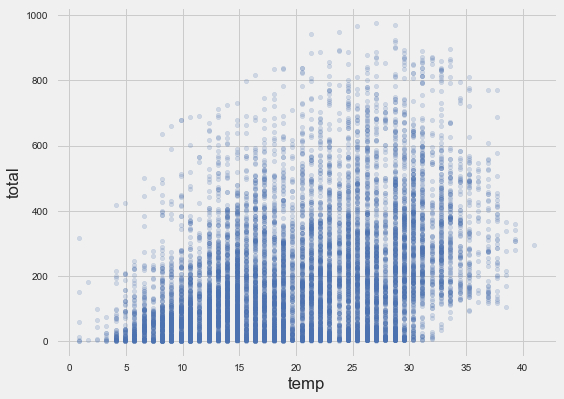

In [7]:
# Pandas scatter plot
bikes.plot(kind='scatter', x='temp', y='total', alpha=0.2)

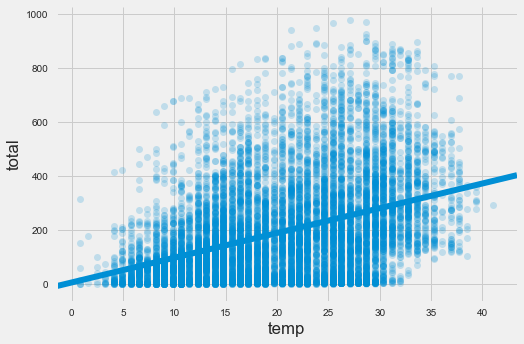

In [8]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

# Introduction to Scikit-Learn (sklearn)

**What is it?** - A widely used Machine Learning library for Python.  
**Why use it?** - Easily implement many machine learning models and tactics quickly and easily without having to build them from stratch.

<a id="benefits-and-drawbacks-of-scikit-learn"></a>
### Benefits and drawbacks of scikit-learn

**Benefits:**

- Consistent interface to machine learning models
- Provides many tuning parameters but with sensible defaults
- Exceptional documentation
- Rich set of functionality for companion tasks
- Active community for development and support

**Potential drawbacks:**

- Harder (than R) to get started with machine learning
- Less emphasis (than R) on model interpretability

Ben Lorica: [Six reasons why I recommend scikit-learn](http://radar.oreilly.com/2013/12/six-reasons-why-i-recommend-scikit-learn.html)

### Requirements for working with data in scikit-learn

1. Features and response should be **separate objects**
2. Features and response should be entirely **numeric**
3. Features and response should be **NumPy arrays** (or easily converted to NumPy arrays)
4. Features and response should have **specific shapes** (outlined below)

<a id="building-a-linear-regression-model-in-sklearn"></a>
## Building a Linear regression model in sklearn

#### Create a feature matrix called X that holds a dataframe with only the temp variable and a Series called y that has the total column.

In [9]:
# create X and y
feature_cols = ['temp']
X = bikes[feature_cols]
y = bikes.total

In [10]:
# check X's type
print(type(X))
print(type(X.values))

<class 'pandas.core.frame.DataFrame'>
<type 'numpy.ndarray'>


In [11]:
# check y's type
print(type(y))
print(type(y.values))

<class 'pandas.core.series.Series'>
<type 'numpy.ndarray'>


In [12]:
# check X's shape (n = number of observations, p = number of features)
print(X.shape)

(10886, 1)


In [13]:
# check y's shape (single dimension with length n)
print(y.shape)

(10886,)


<a id="scikit-learns--step-modeling-pattern"></a>
### scikit-learn's 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [14]:
from sklearn.linear_model import LinearRegression

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for "model"
- "Instantiate" means "make an instance of"

In [15]:
# make an instance of a LinearRegressor object
lr = LinearRegression()
type(lr)

sklearn.linear_model.base.LinearRegression

- Created an object that "knows" how to do linear regression, and is just waiting for data.
- Name of the object does not matter.
- Can specify tuning parameters (aka "hyperparameters") during this step.
- All parameters not specified are set to their defaults.

**Step 3:** Fit the model with data (aka "model training")

- Model is "learning" the relationship between X and y in our "training data".
- Process through which learning occurs varies by model.
- Occurs in-place.

In [16]:
lr.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- Once a model has been fit with data, it's called a "fitted model".

**Step 4:** Predict the response for a new observation.

- New observations are called "out-of-sample" data.
- Uses the information it learned during the model training process.

In [17]:
# per future warming, 1 dimensional arrays must be reshaped using the following.
lr.predict(np.array([0]).reshape(1,-1))

array([ 6.04621296])

- Returns a NumPy array, and we keep track of what the numbers "mean".
- Can predict for multiple observations at once.

In [18]:
X_new = [[0], [10]]
lr.predict(X_new)

array([  6.04621296,  97.75161777])

_What we just predicted using our model is " if the temperatue is 0 degrees the total number of bike rentals will be ~6.046, and if the temperature is 10 degrees the total number of bike rentals will ~97.751"_

#### Explore the intercept and coefficients of the linear model

You can search for "sklearn linear regression" and explore the attributes section of the documentation to learn how to do this.

In [19]:
# print the coefficients
print lr.intercept_
print lr.coef_

6.04621295962
[ 9.17054048]


Interpreting the **intercept** ($\beta_0$):

- It is the value of $y$ when $x$=0.
- Thus, it is the estimated number of rentals when the temperature is 0 degrees Celsius.
- **Note:** It does not always make sense to interpret the intercept. 

Interpreting the **"temp" coefficient** ($\beta_1$):

- It is the change in $y$ divided by change in $x$, or the "slope".
- Thus, a temperature increase of 1 degree Celsius is **associated with** a rental increase of 9.17 bikes.
- This is not a statement of causation.
- $\beta_1$ would be **negative** if an increase in temperature was associated with a **decrease** in rentals.

<a id="using-the-model-for-prediction"></a>
## Using the model for prediction
---

While there is plenty of insight that can be found in reading coefficients, the most common uses of data science focus of prediction. In scikit-learn we can make predictions from a fitted model using `.predict()`, but we will also go through the calculation by hand to understand it.

#### How many bike rentals would we predict if the temperature was 25 degrees Celsius?

In [20]:
# manually calculate the prediction
lr.intercept_ + lr.coef_*25

array([ 235.309725])

In [21]:
# use the predict method
lr.predict(25)

array([ 235.309725])

<a id="does-the-scale-of-the-features-matter"></a>
### Does the scale of the features matter?

Let's say that temperature was measured in Fahrenheit, rather than Celsius. How would that affect the model?

In [22]:
# create a new column for Fahrenheit temperature
bikes['temp_F'] = bikes.temp * 1.8 + 32
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,temp_F
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,49.712
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,48.236
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,48.236
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,49.712
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,49.712


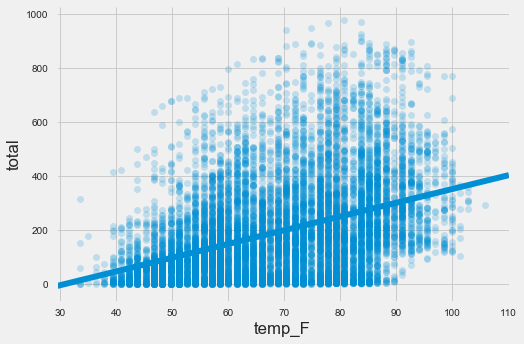

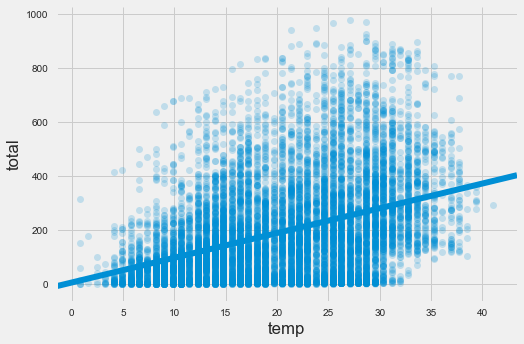

In [23]:
# Seaborn scatter plot with regression line
sns.lmplot(x='temp_F', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})
plt.show()
sns.lmplot(x='temp', y='total', data=bikes, aspect=1.5, scatter_kws={'alpha':0.2})

In [26]:
# 

#### Rebuild the LinearRegression from above using the temp_F features instead.

In [24]:
# create X and y
feature_cols = ['temp_F']
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

-156.985617821
[ 5.09474471]


In [28]:
# 

#### Convert 25 degrees Celsius to Fahrenheit

In [25]:
25 * 1.8 + 32

77.0

#### Predict rentals for 77 degrees Fahrenheit

In [26]:
linreg.predict(77)

array([ 235.309725])

**Conclusion:** ...

In [27]:
# remove the temp_F column
bikes.drop('temp_F', axis=1, inplace=True)

<a id="work-with-multiple-features"></a>
## Work with multiple features
---

We've demonstrated simple linear regression with one feature to gain an intuition, but the benefit of modeling is the ability to reason about hundreds of features at once. We can start with four.

<a id="visualizing-the-data-part-"></a>
### Visualizing the data (part 2)

#### Explore more features.

In [28]:
# Create a features col variables that has temp, season, weather, and humidity
feature_cols = ['temp', 'season', 'weather', 'humidity']

#### Create a subset of scatterplot matrix using Seaborn
We can use pairplot with the y_vars argument to only show relationships with the total variable


_Reminder_
- Weather = 1 : Clear, 2 : Mist, 3 : Light Snow, 4 : Heavy Rain
- Season  = 1 : spring, 2 : summer, 3 : fall, 4 : winter

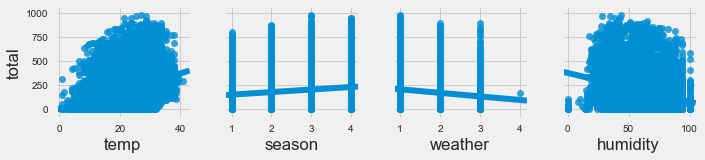

In [29]:
# multiple scatter plots in Seaborn
sns.pairplot(bikes, x_vars=feature_cols, y_vars='total', kind='reg')

#### Recreate the same functionality using Pandas

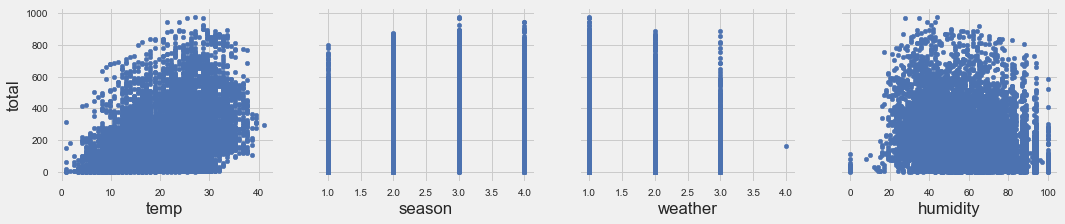

In [30]:
# multiple scatter plots in Pandas
fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    bikes.plot(kind='scatter', x=feature, y='total', ax=axs[index], figsize=(16, 3))

#### Are you seeing anything that you did not expect?

#### Explore the season variable using a box-plot
- 1 = spring, 2 = summer, 3 = fall, 4 = winter

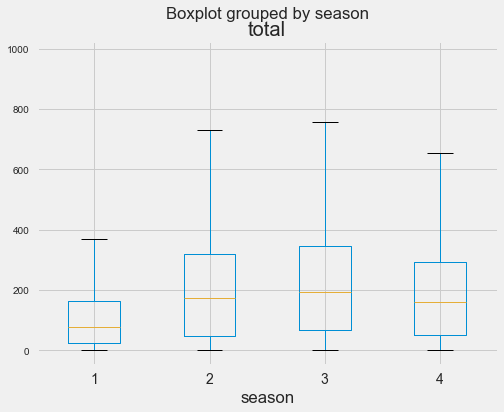

In [31]:
# box plot of rentals, grouped by season
bikes.boxplot(column='total', by='season')

Notably:

- A line can't capture a non-linear relationship.
- There are more rentals in winter than in spring (?)

#### Look at rentals over time.

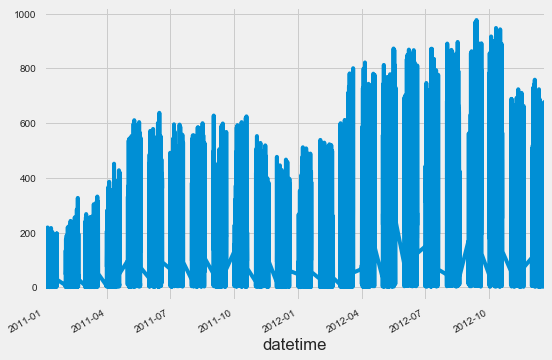

In [32]:
# line plot of rentals
bikes.total.plot()

#### What does this tell us?

There are more rentals in the winter than the spring, but only because the system is experiencing **overall growth** and the winter months happen to come after the spring months.

#### Look at the correlation matrix for the bikes dataframe.

Correlation is calculate via the Pearson's R Correlation Coefficient. 
$$ r = \frac{cov(x,y)}{\sigma x \sigma y}$$

In [33]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


#### Use a heatmap to make it easier to read the correlation matrix.

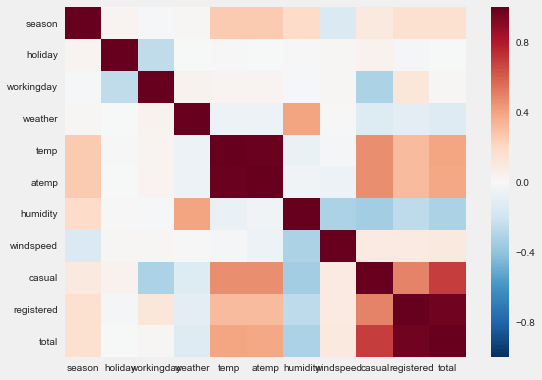

In [34]:
# visualize correlation matrix in Seaborn using a heatmap
sns.heatmap(bikes.corr())

#### What relationships do you notice?

In [39]:
# A:

<a id="adding-more-features-to-the-model"></a>
### Adding more features to the model

In the previous example, one variable explained the variance of another; however, more often than not, we will need multiple variables. 

- For example, a house's price may be best measured by square feet, but a lot of other variables play a vital role: bedrooms, bathrooms, location, appliances, etc. 

- For a linear regression, we want these variables to be largely independent of each other, but all of them should help explain the y variable.

We'll work with bike-share data to showcase what this means and to explain a concept called multicollinearity.

#### Create another LinearRegression instance that is fit using temp, season, weather, and humidity.

In [35]:
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

In [36]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

# print the coefficients
print linreg.intercept_
print linreg.coef_

159.520687861
[  7.86482499  22.53875753   6.67030204  -3.11887338]


In [37]:
# Lets take a day whose temp is 7.38, in spring, where its heavy raining and humidity is 55
exm = np.array([7.38, 1, 4, 55])
exm

array([  7.38,   1.  ,   4.  ,  55.  ])

In [38]:
exm1 = exm.reshape(1, -1)
exm1

array([[  7.38,   1.  ,   4.  ,  55.  ]])

In [39]:
#predict number of bikes

linreg.predict(exm1)

array([ 95.24502595])

In [45]:
# A:

#### Display the linear regression coefficient along with the feature names.

In [40]:
# pair the feature names with the coefficients
zip(feature_cols, linreg.coef_)

[('temp', 7.864824992477442),
 ('season', 22.538757532466779),
 ('weather', 6.6703020359237426),
 ('humidity', -3.1188733823964956)]

Interpreting the coefficients:

- Holding all other features fixed, a 1 unit increase in **temperature** is associated with a **rental increase of 7.86 bikes**.
- Holding all other features fixed, a 1 unit increase in **season** is associated with a **rental increase of 22.5 bikes**.
- Holding all other features fixed, a 1 unit increase in **weather** is associated with a **rental increase of 6.67 bikes**.
- Holding all other features fixed, a 1 unit increase in **humidity** is associated with a **rental decrease of 3.12 bikes**.

Does anything look incorrect and does not reflect reality?

 ----
<a id="what-is-multicollinearity"></a>
## What is Multicollinearity?


Multicollinearity happens when two or more features are highly-correlated with each other. The problem is that due to the high correlation, it's hard to disambiguate which feature has what kind of effect on the outcome. In other words, the features mask each other. 

There is a second related issue called variance inflation where including correlated features increases the variability of our model and p-values by widening the standard errors. This can be measured with the Variance Inflation Factor which we will not cover here.

#### With the bikeshare data, let's compare three data points: actual temperature, "feel" temperature, and guest ridership.

            temp     atemp    casual
temp    1.000000  0.984948  0.467097
atemp   0.984948  1.000000  0.462067
casual  0.467097  0.462067  1.000000
Axes(0.08,0.07;0.696x0.81)


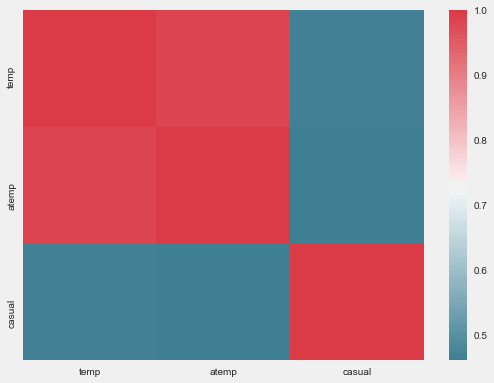

In [41]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
correlations = bikes[['temp', 'atemp', 'casual']].corr()
print correlations
print sns.heatmap(correlations, cmap=cmap)

#### Optional: Create a linear model that predict 'total' using 'temp' and 'atemp'.

In [42]:
# create a list of features
feature_cols = ['temp', 'atemp']

In [43]:
# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg2 = LinearRegression()
linreg2.fit(X, y)

# print the coefficients
print linreg2.intercept_
print linreg2.coef_

4.2481326458
[ 8.19865874  0.90720808]


#### Go back and remove either temp or atemp from the feature list. How do the coefficients change? 

In [50]:
# A:

---
<a id="model-evaluation"></a>
# Model Evaluation

By Default, Sklearn Linear Regression has a `.score` method which can be used to immediately evaluate your model.  The default scoring metric is R2 (R-Squared)
$$ r2 = 1- \frac{SS_{res}}{SS_{tot}}$$

**Sum of Squares of the Residuals**  
- $SS_{res} = \sum(y_i - \bar{y})^2$

    - $y_i$ = True value of y
    - $\bar{y}$ = Mean of all y values

**Total Sum of Squares**
- $SS_{tot} = \sum(y_i - \hat{y_i})^2$
    - $\hat{y_i}$ = Predicted value of y
    
    
R2 is a measure of how much variance in our target (y) is explained by the linear regression equation.

In [44]:
# Lets refit and reset our model 
# create a list of features
feature_cols = ['temp', 'season', 'weather', 'humidity']

# create X and y
X = bikes[feature_cols]
y = bikes.total

# instantiate and fit
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
linreg.score(X,y)

0.25829758327282137

In [ ]:
# According to this R2, our LR is capable of explaining %25 of the variance in our target.

<a id="evaluation-metrics-for-regression-problems"></a>
## Evaluation metrics for regression problems

Evaluation metrics for classification problems, such as **accuracy**, are not useful for regression problems. We need evaluation metrics designed for comparing **continuous values**.

Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
- **MAE** is the easiest to understand, because it is simply the average error and can be directly interpretable in the "y" units.

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
- **RMSE** is even more popular than MSE and MAE simply because it has the strengths of both.  Because we square the errors before averaging them, large errors are more apparent **AND** RMSE is interpretable in the "y" units.

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

#### Calculate MAE, MSE, and RMSE using imports from sklearn metrics and numpy.

In [46]:
# example true and predicted response values
true = [10, 7, 5, 5]
pred = [8, 6, 5, 10]

In [47]:
# calculate these metrics by hand!
from sklearn import metrics
import numpy as np
print 'MAE:', metrics.mean_absolute_error(true, pred)
print 'MSE:', metrics.mean_squared_error(true, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

MAE: 2.0
MSE: 7.5
RMSE: 2.73861278753


In [48]:
# Example of larger errors being punished
# same true values as above
true = [10, 7, 5, 5]

# new set of predicted values
pred = [10, 7, 5, 13]

# MAE is the same as before
print 'MAE:', metrics.mean_absolute_error(true, pred)

# MSE and RMSE are larger than before
print 'MSE:', metrics.mean_squared_error(true, pred)
print 'RMSE:', np.sqrt(metrics.mean_squared_error(true, pred))

MAE: 2.0
MSE: 16.0
RMSE: 4.0


Comparing these metrics:


All of these are **loss functions**, because we want to minimize them.

----

<a id="comparing-linear-regression-with-other-models"></a>
## Comparing linear regression with other models

Advantages of linear regression:

- Simple to explain
- Highly interpretable
- Model training and prediction are fast
- No tuning is required (excluding regularization)
- Features don't need scaling
- Can perform well with a small number of observations
- Well-understood

Disadvantages of linear regression:

- Presumes a linear relationship between the features and the response
- Performance is (generally) not competitive with the best supervised learning methods due to high bias
- Can't automatically learn feature interactions

---

<a id="feature-engineering-to-improve-performance"></a>
### BONUS: Feature engineering to improve performance
---

Machine learning models are very powerful, but they cannot automatically handle every aspect of our data. We have to explicitly modify our features to have relationships that our models can understand. In this case, we will need to pull out features to have a linear relationship with our response variable.

<a id="handling-categorical-features"></a>
<a id="handling-categorical-features"></a>
<a id="handling-categorical-features"></a>
<a id="handling-categorical-features"></a>
### Handling categorical features

scikit-learn expects all features to be numeric. So how do we include a categorical feature in our model?

- **Ordered categories:** transform them to sensible numeric values (example: small=1, medium=2, large=3)
- **Unordered categories:** use dummy encoding (0/1)

What are the categorical features in our dataset?

- **Ordered categories:** weather (already encoded with sensible numeric values)
- **Unordered categories:** season (needs dummy encoding), holiday (already dummy encoded), workingday (already dummy encoded)

For season, we can't simply leave the encoding as 1 = spring, 2 = summer, 3 = fall, and 4 = winter, because that would imply an **ordered relationship**. Instead, we create **multiple dummy variables:**

#### Create dummy variables using get_dummies from Pandas.

In [49]:
season_dummies = pd.get_dummies(bikes.season, prefix='season')

#### Inspect the dataframe of dummies.

In [50]:
# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_1,season_2,season_3,season_4
datetime,,,,
2011-09-05 11:00:00,0,0,1,0
2012-03-18 04:00:00,1,0,0,0
2012-10-14 17:00:00,0,0,0,1
2011-04-04 15:00:00,0,1,0,0
2012-12-11 02:00:00,0,0,0,1


However, we actually only need **three dummy variables (not four)**, and thus we'll drop the first dummy variable.

Why? Because three dummies captures all of the "information" about the season feature, and implicitly defines spring (season 1) as the **baseline level:**.

This circles back to the concept multicollinearity, except instead of 1 feature being highly coorelated to another, the information gained from three features is directly coorelated to the fourth.

#### Drop the first column.

In [51]:
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

#### Reinspect the dataframe of dummies.

In [52]:
# print 5 random rows
season_dummies.sample(n=5, random_state=1)

,season_2,season_3,season_4
datetime,,,
2011-09-05 11:00:00,0,1,0
2012-03-18 04:00:00,0,0,0
2012-10-14 17:00:00,0,0,1
2011-04-04 15:00:00,1,0,0
2012-12-11 02:00:00,0,0,1


In general, if you have a categorical feature with **k possible values**, you create **k-1 dummy variables**.

If that's confusing, think about why we only need one dummy variable for holiday, not two dummy variables (holiday_yes and holiday_no).

#### We now need to concatenate the two dataframe together

In [53]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,
2011-09-05 11:00:00,3,1,0,2,28.70,33.335,74,11.0014,101,207,308,0,1,0
2012-03-18 04:00:00,1,0,0,2,17.22,21.210,94,11.0014,6,8,14,0,0,0
2012-10-14 17:00:00,4,0,0,1,26.24,31.060,44,12.9980,193,346,539,0,0,1
2011-04-04 15:00:00,2,0,1,1,31.16,33.335,23,36.9974,47,96,143,1,0,0
2012-12-11 02:00:00,4,0,1,2,16.40,20.455,66,22.0028,0,1,1,0,0,1


#### Rerun the linear regression with dummy variables included

In [54]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total
linreg = LinearRegression()
linreg.fit(X, y)
zip(feature_cols, linreg.coef_)

[('temp', 11.186405863575786),
 ('season_2', -3.3905430997179926),
 ('season_3', -41.736860713170813),
 ('season_4', 64.415961468242045),
 ('humidity', -2.8194816362596491)]

How do we interpret the season coefficients? They are **measured against the baseline (spring)**:

- Holding all other features fixed, **summer** is associated with a **rental decrease of 3.39 bikes** compared to the spring.
- Holding all other features fixed, **fall** is associated with a **rental decrease of 41.7 bikes** compared to the spring.
- Holding all other features fixed, **winter** is associated with a **rental increase of 64.4 bikes** compared to the spring.

Would it matter if we changed which season was defined as the baseline?

- No, it would simply change our **interpretation** of the coefficients.

_In most situations it is best to have your the dummy that your drop, your baseline, be the category that has the largest representation.  _

**Important:** Dummy encoding is relevant for all machine learning models, not just linear regression models.

----

<a id="bonus-material-regularization"></a>
## Bonus material: Regularization
---

- Regularization is a method for "constraining" or "regularizing" the **size of the coefficients**, thus "shrinking" them towards zero.
- It reduces model variance and thus **minimizes overfitting**.
- If the model is too complex, it tends to reduce variance more than it increases bias, resulting in a model that is **more likely to generalize**.

Our goal is to locate the **optimum model complexity**, and thus regularization is useful when we believe our model is too complex.

<a id="how-does-regularization-work"></a>
<a id="how-does-regularization-work"></a>
<a id="how-does-regularization-work"></a>
<a id="how-does-regularization-work"></a>
### How does regularization work?

For a normal linear regression model, we estimate the coefficients using the least squares criterion, which **minimizes the residual sum of squares (RSS):**

For a regularized linear regression model, we **minimize the sum of RSS and a "penalty term"** that penalizes coefficient size.

**Ridge regression** (or "L2 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p \beta_j^2$$

**Lasso regression** (or "L1 regularization") minimizes: $$\text{RSS} + \alpha \sum_{j=1}^p |\beta_j|$$

- $p$ is the **number of features**
- $\beta_j$ is a **model coefficient**
- $\alpha$ is a **tuning parameter:**
    - A tiny $\alpha$ imposes no penalty on the coefficient size, and is equivalent to a normal linear regression model.
    - Increasing the $\alpha$ penalizes the coefficients and thus shrinks them.

<a id="lasso-and-ridge-path-diagrams"></a>
<a id="lasso-and-ridge-path-diagrams"></a>
<a id="lasso-and-ridge-path-diagrams"></a>
<a id="lasso-and-ridge-path-diagrams"></a>
### Lasso and ridge path diagrams

A larger alpha (towards the left of each diagram) results in more regularization:

- **Lasso regression** shrinks coefficients all the way to zero, thus removing them from the model
- **Ridge regression** shrinks coefficients toward zero, but they rarely reach zero

Source code for the diagrams: [Lasso regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_lars.html) and [Ridge regression](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ridge_path.html)

![Lasso and Ridge Coefficient Plots](./assets/images/lasso_ridge_path.png)

<a id="advice-for-applying-regularization"></a>
<a id="advice-for-applying-regularization"></a>
<a id="advice-for-applying-regularization"></a>
<a id="advice-for-applying-regularization"></a>
### Advice for applying regularization

**Should features be standardized?**

- Yes, because otherwise, features would be penalized simply because of their scale.
- Also, standardizing avoids penalizing the intercept, which wouldn't make intuitive sense.

**How should you choose between Lasso regression and Ridge regression?**

- Lasso regression is preferred if we believe many features are irrelevant or if we prefer a sparse model.
- Ridge can work particularly well if there is a high degree of multicolinearity in your model.
- If model performance is your primary concern, it is best to try both.
- ElasticNet regression is a combination of lasso regression and ridge Regression.

<a id="ridge-regression"></a>
<a id="ridge-regression"></a>
<a id="ridge-regression"></a>
<a id="ridge-regression"></a>
### Ridge regression

- [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) documentation
- **alpha:** must be positive, increase for more regularization
- **normalize:** scales the features (without using StandardScaler)

In [55]:
# include dummy variables for season in the model
feature_cols = ['temp', 'atemp', 'season_2', 'season_3', 'season_4', 'humidity']
X = bikes[feature_cols]
y = bikes.total

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [57]:
# alpha=0 is equivalent to linear regression
from sklearn.linear_model import Ridge
# instantiate the model 
#(alpha of zero has no regularization strength, essentially a basic linear regression)
ridgereg = Ridge(alpha=0, normalize=True)
# fit the model
ridgereg.fit(X_train, y_train)
# redict with fitted model
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

156.674293499


In [58]:
# coefficients for a non-regularized linear regression
zip(feature_cols, ridgereg.coef_)

[('temp', 8.537530902593641),
 ('atemp', 2.4548540987561474),
 ('season_2', -9.3254295677866299),
 ('season_3', -40.678996197465878),
 ('season_4', 61.117489283648744),
 ('humidity', -2.8650448305441487)]

To interpret these coefficients we need to convert them back to original units, which is a reason to do normalization by hand. However, in this form the coefficients have a special meaning. The intercept is now the average of our outcome, and the magnitude of each coefficient in the model is a measure of how important it is in the model. We call this feature importance.

In [59]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print np.sqrt(metrics.mean_squared_error(y_test, y_pred))

156.960986626


In [61]:
# examine the coefficients
zip(feature_cols, ridgereg.coef_)

[('temp', 5.2574526598730271),
 ('atemp', 4.2545232915388365),
 ('season_2', -0.17934556275264316),
 ('season_3', -21.483942605445613),
 ('season_4', 56.682207841866358),
 ('humidity', -2.6588377914640908)]

While the MSE barely improved, we can see there are significant changes in the weight of our coefficients.  Particularly `season_2` whose coefficent has greatly decreased towards 0.

Fitting and using a Lasso Regression in SKLearn is the same.  

In addition to the typical [Lasso](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html) and [Ridge](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html) there is a third type of regression, [Elastic Net](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html) which combines the penalties of the Ridge and Lasso methods.